### Interactive notebook to compare singals of sensors visually

Multiple sensors can be loaded and compared. Signal is downsampled to a frequency of 1h such that the plots respond fast. The signal can be smoothed to find trends, see if they measure similiarly once the noise is removed. the signal can also be normalized which allows for comparison of sensors even if absoult values are at different scale

In [3]:
import sys
sys.path.append(r'C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs')
from libs.UWO_DataAnalysis import helper_functions
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

In [4]:
data_dataframe1=helper_functions.filter_db_for_boxplot(sensor_group='bf', start='2016-01-01', parameter_unit='l/s', keyword='test')
data_dataframe=helper_functions.downsample_data(dataframe=data_dataframe1, timestamp_col_name='timestamp', groupby_att=['source_name', 'parameter_name', 'unit'])


You are successfully connected to the database!


In [5]:
def filter_data(data, valid_parameters, valid_sources):

    plot_data=data_dataframe[data_dataframe['parameter_name'].isin(valid_parameters)]
    plot_data=plot_data[plot_data['source_name'].isin(valid_sources)]

    return plot_data

# Define a function that updates the content of y based on what we select for x
def update_multiple_widgets(*args):
    y_widget.options = data_dataframe[data_dataframe['parameter_name'].isin(x_widget.value)]['source_name'].unique().tolist()
    
x_widget = helper_functions.generate_SelectMultipleWidget_for_boxplot(data=data_dataframe, column_name='parameter_name')
y_widget = widgets.SelectMultiple()

x_widget.observe(update_multiple_widgets)

filter=interactive(filter_data, data=fixed(data_dataframe), valid_parameters=x_widget, valid_sources=y_widget)
display(filter)

interactive(children=(SelectMultiple(description='Select the parameters that should be compared', layout=Layou…

interactive(children=(SelectMultiple(description='Select the parameters that should be compared', index=(0,), …

<function libs.UWO_DataAnalysis.helper_functions.plot_flattened_signal(data, group_att='source_name', value_column='value', valid_parameters='', valid_sources='', timestamp_column='timestamp', median_win_size=3, mean_win_size=24, normalize=None, min_max=[0, 100])>

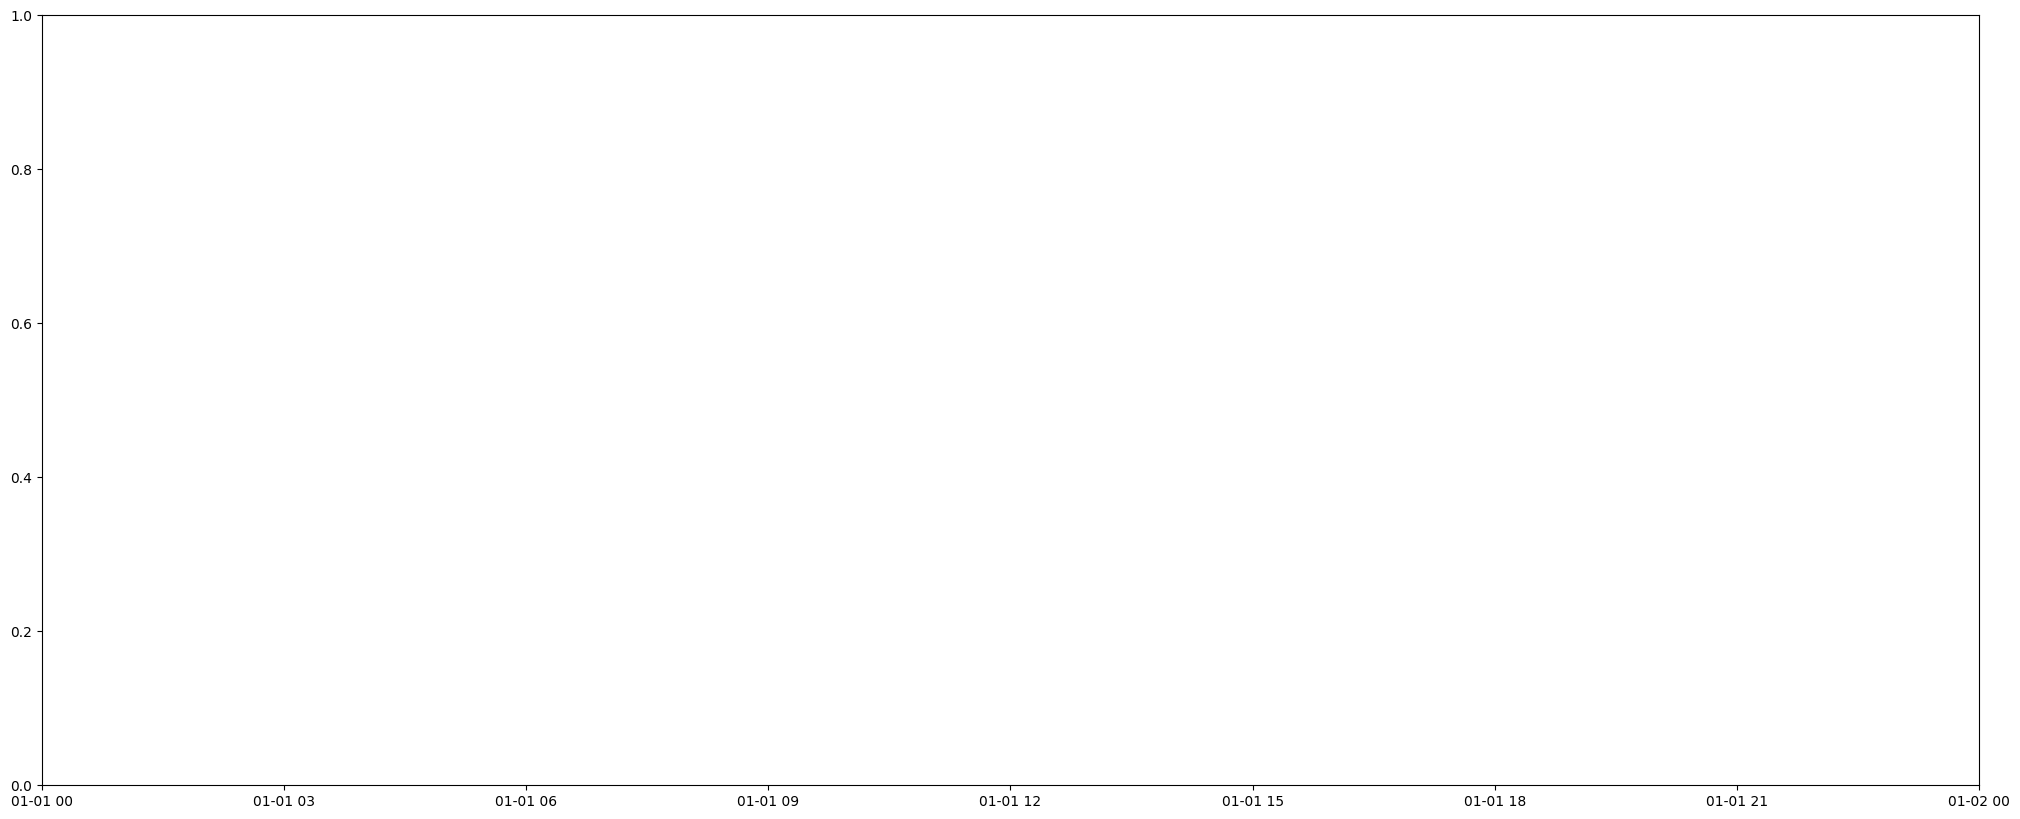

In [6]:
interact(helper_functions.plot_flattened_signal, data=fixed(data_dataframe), valid_parameters = x_widget, 
    valid_sources=y_widget, group_att=fixed('source_name'), value_column=fixed('value'), timestamp_column=fixed('timestamp'),
    min_max=helper_functions.generate_accepted_values(data=data_dataframe['value']),
    median_win_size=helper_functions.generate_Slider_for_noise_filtering(),
    mean_win_size=helper_functions.generate_Slider_for_smoothing(), 
    normalize=helper_functions.generate_Options_for_normalizing(),
    )